In [1]:
#hidden cell to be executed BEFORE the presentation
import warnings
warnings.filterwarnings('ignore')
import sys
path_dftpy = './dftpy/src' # If DFTpy is not in PYTHONPATH, change it to the path of where dftpy/src is located.
path_qepy = './qepy/qepy'
sys.path.insert(0, path_dftpy)
#sys.path.insert(0, path_qepy)
import numpy as np
import matplotlib.pyplot as plt
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.time_data import TimeData
from dftpy.optimization import Optimization
from dftpy.mpi import sprint
from IPython.lib.display import YouTubeVideo
file1='Al_lda.oe01.recpot'
PP_list = {'Al': './dftpy/examples/DATA/'+file1}

In [2]:
#hidden cell to be executed BEFORE the presentation
from ase_notebook import AseView, ViewConfig
config = ViewConfig()
ase_view = AseView(config)
ase_view = AseView(
    rotations="45x,45y,45z",
    atom_font_size=16,
    axes_length=30,
    canvas_size=(700, 300),
    zoom=1.2,
    show_bonds=True
)
ase_view.config.uc_dash_pattern=(.6,.4)
#ase_view.add_miller_plane(
#    1, 0, 0, color="green")
ase_view.config
ase_view.config.canvas_color_background = "blue"
ase_view.config.canvas_background_opacity = 0.2

def view (ions):
    gui = ase_view.make_render(
    ions, center_in_uc=True)
    return gui
from ase.build import bulk
atoms = bulk('Al', 'fcc', a=4.05, cubic=True)
ions = Ions.from_ase(atoms)
gui=view(ions)
gui
print('Done with preambles')

Done with preambles


<center>
    <h1>The (almost) all-Python DFTpy and QEpy softwares</h1>
<center>
<br>
<table>
  <tr>
      <td><p><h1>Pavanello Research Group</h1></p><p><h2>Rutgers University-Newark</h2></p></td>
      <td><img src="figures/logos/run.png" width=200 height=200 /></td>
  </tr>
  <tr>
    <td></td>
    <td> http://prg.rutgers.edu</td>
  </tr>
</table>

#### LLNL Computational Chemistry & Materials Science Summer Institute -- July 26, 2022


# Learning Goals

#### Theory and techniques

<div class="alert alert-block alert-success">
    <h4>Understand the theory of DFT</h4>
    <ul>
        <li> Orbital-free DFT</li>
        <li> Kohn-Sham DFT</li>
    </ul>
    <p style="text-align: center;"><small>Work individually or in groups. Time: 30'</small></p>
</div>

<div class="alert alert-block alert-success">
    <h4>GitHub and Google Colaboratory</h4>
    <ul>
        <li> Track your work with Git (GitLab, GitHub)</li>
        <li> Jupyter Notebooks on the Google Colaboratory "colab" </li>
    </ul>
    <p style="text-align: center;"><small>Work individually. Time: 15'</small></p>
</div>




# Learning Goals

####  Coding


<div class="alert alert-block alert-danger">
    <h4>Be able to run simulations... in Python</h4>
    <ul>
        <li> Orbital-free DFT with DFTpy</li>
        <li> Plot results with matplotlib</li>
        <li> Make your own $T_s[n]$! </li>
    </ul>
    <p style="text-align: center;"><small>Work individually or in groups. Time: 30'</small></p>
</div>

<div class="alert alert-block alert-danger">
    <h4>Kohn-Sham DFT</h4>
    <ul>
        <li> Kohn-Sham DFT with QEpy</li>
        <li> Make your own $E_{xc}[n]$! </li>
    </ul>
    <p style="text-align: center;"><small>Work individually or in groups. Time: 45'</small></p>
</div>


# Ready to get back to work?

<div class="alert alert-block alert-success">
    <center><b><a href="https://classroom.github.com/a/mGGwwsKj">Lecture 2 assignment</a></b></center>
    </div>

# Understand the Theory of DFT
#### Challenge

- Write down the Kohn-Sham DFT energy density functional.

$$
E[n]=\ldots
$$

### ...understand the Theory of DFT
- What is the difference between the noninteracting kinetic energy functional, $T_s[n]$, and the total kinetic energy, $T[n]$?


### ...understand the Theory of DFT
- Write down an expression for $T_s[n]$ for a uniform electron gas system in terms of its KS orbitals, $\Psi_i(\mathbf{r})=\frac{1}{\Omega^{1/2}}e^{i\mathbf{k}_i\cdot\mathbf{r}}$.


### ...understand the Theory of DFT
- Be ready to discuss it with others or with the class.

Write here your discussion points

# Git and GitHub

- Did you use Git and/or GitHub before? (show hands)
- ...if not, pair with another student who has worked with Git/GitHub before
- Sign in/up GitHub
- Share your GitHub handle with me. I will add you as "student" to a GitHub Classroom.

<div class="alert alert-block alert-success">
    <center><b><a href="https://classroom.github.com/a/KD3e2KGA">GitHub tutorial</a></b></center>
    </div>

# Google colaboratory (colab)

<div class="alert alert-block alert-success">
    <center><b><a href="https://colab.research.google.com/">https://colab.research.google.com/</a></b></center>
    </div>
    
- Free and easy to use Jupyter Notebook
- You can run both DFTpy and QEpy with it
- Hit "new notebook" (lower right)


#### Challenge
- Write a minimal code in a "colab" notebook
- Verify that it runs and produces the desired output
- Reproduce (paste) the code in this notebook 
- Paste here a link to your new colab notebook in a separate markdown cell

##### for example:

In [3]:
print('Riding around...')
for i in range(5):
    print(str(i+1)+' times,')
print('Happy to ride!')

Riding around...
1 times,
2 times,
3 times,
4 times,
5 times,
Happy to ride!


# Let's run simulations on colab

 - Prepare a new, empty notebook on the colab
 - visualize `dftpy.ipynb` from LLNL-2-yourname
 - Cut and paste the content of each cell in the colab notebook
 - run it!

# Understanding the `dftpy.ipynb` notebook

### First a model system of bulk Al (cubic cell) is generated with `ASE`

In [4]:
from ase.build import bulk
atoms = bulk('Al', 'fcc', a=4.05, cubic=True)

In [5]:
ions = Ions.from_ase(atoms)

<div class="alert alert-block alert-success">
    <b>Understand more deeply:</b>
    Try a different bulk symmetry (bcc?) or make a surface. Visualize the structures.
    </div>

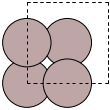

In [6]:
from ase.io import write
write('image.png', atoms)
from IPython.display import Image
Image('image.png')

# Let's try other systems
#### Surfaces?

In [7]:
from ase.build import fcc111
atoms = fcc111('Al', size=(2,2,3), vacuum=10.0)
view(atoms)

GridspecLayout(children=(Renderer(camera=PerspectiveCamera(aspect=2.3333333333333335, fov=10.0, position=(0.0,…

#### The FFT grid

In [8]:
nr = ecut2nr(ecut=35, lattice=ions.cell)

In [9]:
grid = DirectGrid(lattice=ions.cell, nr=nr)

#### Local pseudopotential (external potential)

In [10]:
PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list)

setting key: Al -> ./dftpy/examples/DATA/Al_lda.oe01.recpot


#### Initial guess for the electron density

In [11]:
rho_ini = DirectField(grid=grid)
rho_ini[:] = ions.get_ncharges()/ions.cell.volume

#### The $E_H[n]$ and $E_{xc}[n]$ functionals

In [12]:
HARTREE = Functional(type='HARTREE')
XC = Functional(type='XC',name='LDA')

#### The $T_s[n]$ functional

In [13]:
KE = Functional(type='KEDF',name='x_TF_y_vW')

#### The total energy, $E[n]$, functional

In [14]:
evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)

### Minimize $E[n]-\mu \left[\int n(\mathbf{r}) d\mathbf{r} -N \right]$

In [15]:
optimization_options = {'econv' : 1e-3*ions.nat}
opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options,
        optimization_method = 'TN')
rho = opt.optimize_rho(guess_rho=rho_ini)

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       2.692153511701E+00      2.692154E+00    7.877088E-01    1       1       1.130652E-02    
1       2.509905170133E+00      -1.822483E-01   7.033209E-02    2       1       2.633977E-02    
2       2.502273081151E+00      -7.632089E-03   4.803541E-03    7       1       5.550790E-02    
3       2.502030159514E+00      -2.429216E-04   3.640538E-04    5       1       7.753277E-02    
4       2.501995243614E+00      -3.491590E-05   3.590721E-05    6       1       1.063123E-01    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3011459393991195
Chemical potential (eV)  : 8.19459762474792


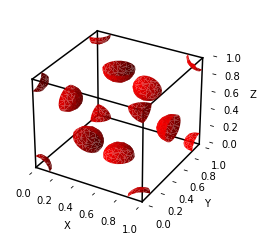

In [16]:
from dftpy.visualize import view as viewd
%matplotlib inline
viewd(data=rho)

# Challenge
- make a new notebook on the colab
- build a bulk FCC Al
- determine the total energy for lattice constant from $a=2$&#8491; to $a=6$&#8491; over 10 points.
- plot the energy vs. $a$ 

#### Tip

In [17]:
for i in range(10):
    aloop=2+(6-2)/9*i
    print(aloop)
    # insert here the DFTpy code!!!

2.0
2.4444444444444446
2.888888888888889
3.333333333333333
3.7777777777777777
4.222222222222222
4.666666666666666
5.111111111111111
5.555555555555555
6.0


# New goal: KS-DFT in Python
- run Quantum ESPRESSO with the Python interface QEpy
- do it on the colab!
- check out the `qepy.ipynb` notebook 

# Understanding the `qepy.ipynb` notebook

#### QEpy driver: Python driver class for Quantum ESPRESSO
This is the main QEpy class

In [18]:
from qepy.driver import Driver
from qepy.io import QEInput

#### Make an "input file"

In [19]:
qe_options = {
    '&control': {
        'calculation': "'scf'",
        'prefix': "'Al'",
        'pseudo_dir': "'./qepy/examples/scf'",
        'restart_mode': "'from_scratch'"},
    '&system': {
        'ibrav' : 0,
        'degauss': 0.005,
        'ecutwfc': 30,
        'nat': 1,
        'ntyp': 1,
        'occupations': "'smearing'"},
    'atomic_positions crystal': ['Al    0.0  0.0  0.0'],
    'atomic_species': ['Al  26.98 Al_ONCV_PBE-1.2.upf'],
    'k_points automatic': ['2 2 2 0 0 0'],
    'cell_parameters angstrom':[
        '0.     2.025  2.025',
        '2.025  0.     2.025',
        '2.025  2.025  0.   '],
}

#### Initialize QEpy driver

In [20]:
driver=Driver(qe_options=qe_options, logfile=True)

#### Run the SCF

In [21]:
driver.scf()

-137.92976389456857

#### Extract information from driver

In [22]:
driver.get_scf_error()

7.736788269659623e-08

#### ...even have access to density and wavefunctions!

In [23]:
rho=driver.get_density()
nr=driver.get_number_of_grid_points()

#### Let's reshape the density to something like `rho[x,y,z]`

In [24]:
rho_new=rho.reshape(nr,order='F')

Be mindful, Quantum ESPRESSO is coded in Fortran

#### Let's plot the density along the $z$ axis

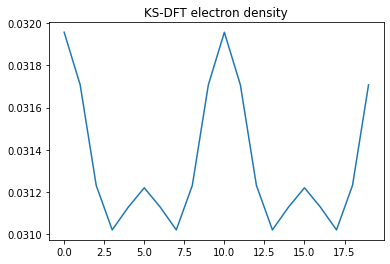

In [25]:
import matplotlib.pyplot as plt
plt.plot(rho_new[0,10,:])
plt.title('KS-DFT electron density');

#### Cleanup driver
Needed to reset the memory to be able to create other drivers (if needed)

In [26]:
driver.stop()

# Big Challenge
- Plot energy vs lattice constant for bulk Al (bcc or fcc) with QEpy
- Use the notebook `qepy.ipynb`
- Port to colab...etc
- Be mindful of the computational scaling of KS-DFT compared to OF-DFT

# Final challenge: Coding new DFT methods
Coding new DFT functionals in DFTpy and QEpy is barrierless

#### DFTpy
- define new `Functional`
- add it to the `TotalFunctional`

#### QEpy
- define new potential as a function of the density
- run SCF in a sequential way rather than in one step with `driver.scf()`

# First: write down correct formulas
####  Dirac's exchange
The energy functional is:
$$E_x[n]=-\frac{3}{4}\left(\frac{3}{\pi}\right)^{1/3}\int n^{4/3}(\mathbf{r}) d \mathbf{r}$$

The potential is:
$$v_x(\mathbf{r})=-\left(\frac{3}{\pi}\right)^{1/3}n^{1/3}(\mathbf{r})$$

# Dirac exchange in DFTpy
We need to code a new `Functional`

In [27]:
from dftpy.functional.abstract_functional import AbstractFunctional
from dftpy.functional.functional_output import FunctionalOutput
import numpy as np

class DiracExchange(AbstractFunctional):
    def __init__(self):
        self.type = 'x'
        self.name = 'Dirac Exchange'
    def compute(self, rho,**kwargs):
        v_of_r = -rho**(1.0/3.0)*(3.0/np.pi)**(1.0/3.0) # put any potential you like here!!!
        e=(v_of_r*rho).integral()*(3.0/4.0)             # put corresponding energy here!
        functional=FunctionalOutput(name="Exchange", potential=v_of_r, energy=e)
        return functional

# Let's try our new Dirac exchange
#### Instance the classes

In [28]:
DIRAC = DiracExchange()

In [29]:
evaluator = TotalFunctional(KE=KE, X=DIRAC, HARTREE=HARTREE, PSEUDO=PSEUDO)

#### Run the optimization

In [30]:
optimization_options = {'econv' : 1e-3*ions.nat}
opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options,
        optimization_method = 'TN')
rho = opt.optimize_rho(guess_rho=rho_ini)

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       3.224506810783E+00      3.224507E+00    7.877088E-01    1       1       4.382133E-03    
1       3.042835087352E+00      -1.816717E-01   6.974059E-02    2       1       2.281976E-02    
2       3.035290456562E+00      -7.544631E-03   4.685543E-03    7       1       4.686832E-02    
3       3.035053841421E+00      -2.366151E-04   3.518829E-04    5       1       6.093955E-02    
4       3.035020223496E+00      -3.361793E-05   3.420774E-05    6       1       7.765889E-02    
#### Density Optimization Converged ####
Chemical potential (a.u.): 0.3522365615658572
Chemical potential (eV)  : 9.584844134097555


# Dirac exchange in QEpy
- We need to run the SCF iteratively (cannot use `driver.scf`)
- We need to provide an additional external potential with Dirac's exchange

#### Let's first make a function for $E_x[n]$

In [31]:
def dirac_x(rho,dV):
    v_of_r = -rho**(1.0/3.0)*(3.0/np.pi)**(1.0/3.0) # put any potential you like here!!!
    e=np.sum((v_of_r*rho))*(3.0/4.0)*dV             # put corresponding energy here!
    print('exchange energy: ',e*2)
    return v_of_r*2,e*2
# x 2 is for converting Ha to Ry, units used by Quantum ESPRESSO

#### Initialize the QEpy driver - this time with iterative SCF

In [32]:
driver=Driver(qe_options=qe_options, iterative = True, logfile=True)

#### Run the SCF with a `for` loop

In [33]:
for i in range(60):
    driver.diagonalize()
    driver.mix()
    converged = driver.check_convergence()
    print ('It: ',i,' - Conv: ', driver.get_scf_error())
    if converged : break

It:  0  - Conv:  7.736788269659623e-08
It:  1  - Conv:  7.736788269659623e-08
It:  2  - Conv:  7.736788269659623e-08
It:  3  - Conv:  6.727745255482617e-08


#### Print the total electronic energy

In [34]:
driver.get_energy()

-137.92976389644423

#### What xc functional have we been using?
- This was automatically selected by Quanrum ESPRESSO from the pseudopotential

In [35]:
driver.get_xc_functional()

'PBE               '

#### Close driver

In [36]:
driver.stop()

#### Adding a new exchange-correlation functional

In [37]:
driver=Driver(qe_options=qe_options, iterative = True, logfile=True)

#### Notice the `set_external_potential` method
- extpot is a `numpy.Array` of same shape as the density

In [38]:
for i in range(60):
    nr=driver.get_number_of_grid_points()
    nnr=np.prod(nr)
    l=driver.get_ions_lattice()
    V=np.dot(l[0],np.cross(l[1],l[2]))
    dV=V/nnr
    extpot, ex = dirac_x(driver.get_density(),dV)
    driver.set_external_potential(potential=extpot,exttype='100')
    driver.diagonalize()
    driver.mix()
    converged = driver.check_convergence()
    print ('It: ',i,' - Conv: ', driver.get_scf_error())
    if converged : break
driver.get_energy()+ex

exchange energy:  -14.017514609708803
It:  0  - Conv:  6.727745255482617e-08
exchange energy:  -13.71703591034752
It:  1  - Conv:  6.727745255482617e-08
exchange energy:  -13.695368040669944
It:  2  - Conv:  6.727745255482617e-08
exchange energy:  -13.700108037848489
It:  3  - Conv:  7.139351190820173e-08


-154.42914245180356

#### `set_external_potential` method `exttype` options
<table>
  <tr>
    <th>exttype</th>
    <th>term replaced in $v_s(\mathbf{r})$</th>
  </tr>
  <tr>
    <td>000</td>
    <td>external potential</td>
  </tr>
  <tr>
    <td>001</td>
    <td>local pseudopotential</td>
  </tr>
  <tr>
    <td>010</td>
    <td>hartree potential</td>
  </tr>
  <tr>
    <td>011</td>
    <td>hartree and pseudopotential</td>
  </tr>
  <tr>
    <td>100</td>
    <td>exchange-correlation</td>
  </tr>
  <tr>
    <td>101</td>
    <td>exchange-correlation and pseudopotential</td>
  </tr>
  <tr>
    <td>110</td>
    <td>hartree and exchange-correlation</td>
  </tr>
  <tr>
    <td>111</td>
    <td>pseudo+hartree+xc</td>
  </tr>
</table>    

In [39]:
driver.set_external_potential(potential=extpot,exttype='100')

In [40]:
driver.stop()

# Now implement it yourself on the colab!!
- make a new notebook using `qepy.ipynb` as template
- consult `LLNL_2022_Lecture_2.ipynb` for details on giving QEpy a custom xc potential
- commit to your repo once done

# We are done! Thank you!

And a big thanks to PRG's awesome Postdocs and Graduate Students, but especially
- Dr. Xuecheng Shao for doing everything, really
- Dr. Kaili Jiang, for the TDDFT modules and modularization of DFTpy
- Andres Cifuentes for installation and documentation support
- Jessica Martinez for documentation support